<a href="https://colab.research.google.com/github/isa-dgc/ML/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O KNN (K-Nearest Neighbors)
- Sendo a figura abaixo,

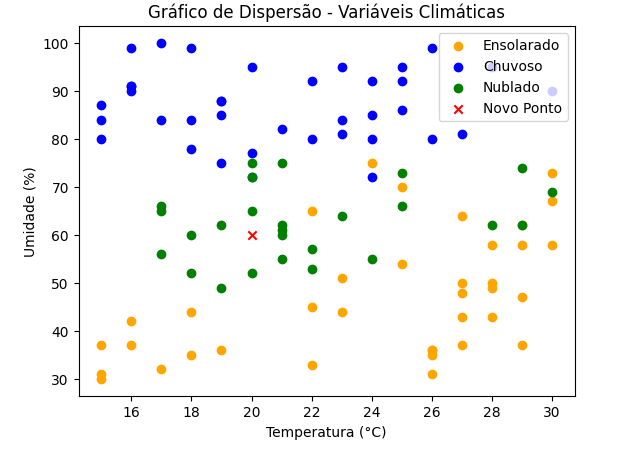

- Podemos nos perguntar: **"qual seria a cor do ponto vermelho?"**
    - Por qual motivo pensamos que o ponto é verde? Pois vamos supor que se todos os pontos nessa região são de uma cor, existe uma probabilidade muito maior desse novo ponto ser da mesma cor pois eles compartilham as mesmas características
- **É exatamente essa a lógica que o KNN utiliza!**
    - Sendo um dos algoritmos mais simples, ele utiliza a similaridade entre os **k pontos mais próximos** do dataset para estimar o valor das novas observações
    - Todo o processamento é feito no momento da previsão e, por isso, esse aprendizado é chamado de "aprendizado preguiçoso" (lazy learning) - isso pode ser muito custoso em datasets maiores e em modelos que precisamos fazer a previsão de forma imediata
    - Por padrão, cada ponto possui o mesmo peso na previsão, porém é possível utilizar o hiperparâmetro "weights" com o valor "distance" para fazer os pontos mais próximos terem mais influência nessa previsão
    - Outra forma de utilizar vizinhos mais próximos, é considerar os vizinhos dentro de um raio específico utilizando o **RadiusNeighborsClassifier**
- **Atenção: cuidado ao usar o KNN em variáveis com escala muito diferentes!**

- **Vamos considerar uma base simplificada**

In [ ]:
# Importando o pandas
import pandas as pd

In [ ]:
# Usando a base de dados abaixo
dados = {
    'A': [1,1.5,2,1.5,-1,-0.5,0,-0.5],
    'A2': [-0.5,0,-0.5,-1,1.5,2,1.5,1],
    'B': [1,1.5,1,0.5,-1,-0.5,-1,-1.5],
    'B2': [-1.5,-1,-0.5,-1,0.5,1,1.5,1],
    'y': [1,1,1,1,0,0,0,0],
    'y2': [0,0,0,0,1,1,1,1]
}

dados = pd.DataFrame(dados)

In [ ]:
# E esses dados para fazer a previsão
dados_pred = {
    'A': [2.5,1.8,0.5,-1,-1],
    'B': [2,1,0,0,-1.5],
    'A2': [2.5,1.8,0.5,-1,-1],
    'B2': [2,1,0,0,-1.5],
}

dados_pred = pd.DataFrame(dados_pred)

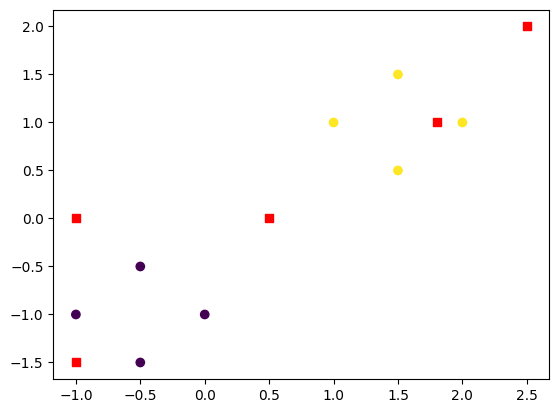

In [ ]:
# Podemos visualizar graficamente esses pontos
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x=dados.A,
           y=dados.B,
           c=dados.y,
           cmap='viridis')
ax.scatter(x=dados_pred.A,
           y=dados_pred.B,
           c='r',marker='s')

plt.show()

<a id='KNN'></a>
- **Agora vamos utlizar o KNN**
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [ ]:
# Importando o KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Criando o classificador
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Selecionando os pontos de treino
X = dados[['A2','B2']]
y = dados.y2

In [ ]:
# E agora selecionando os dados de teste
X_test = dados_pred[['A2','B2']]

In [ ]:
# Podemos fazer o fit com os dados de treino
clf = clf.fit(X,y)

In [ ]:
# E a previsão para os dados de teste
y_pred = clf.predict(X_test)

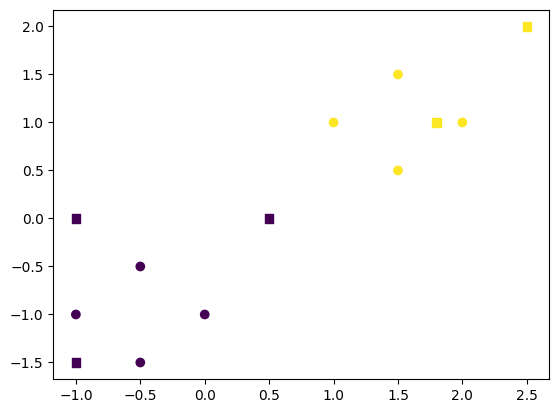

In [ ]:
# Podemos incluir nos dados de treino, a visualização dos dados de teste
fig, ax = plt.subplots()

ax.scatter(x=dados.A,
           y=dados.B,
           c=dados.y,
           cmap='viridis')
ax.scatter(x=dados_pred.A,
           y=dados_pred.B,
           c=y_pred,marker='s')

plt.show()

- **Importante**:
    - "Aviso: Em relação aos algoritmos dos vizinhos mais próximos, se dois vizinhos tiverem distâncias idênticas, mas rótulos diferentes, o resultado dependerá da ordenação dos dados de treinamento."

In [ ]:
# Podemos visualizar os dados que usamos anteriormente
dados[['A2','B2','y2']]

,A2,B2,y2
0,-0.5,-1.5,0
1,0.0,-1.0,0
2,-0.5,-0.5,0
3,-1.0,-1.0,0
4,1.5,0.5,1
5,2.0,1.0,1
6,1.5,1.5,1
7,1.0,1.0,1


- **Agora vamos [voltar](#KNN) e usar os valores A2, B2, ... que mudam a ordem dos dados**

### Vamos utilizar o KNN para dados reais
- **Novamente utilizando o dataset iris**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [ ]:
# Importando o dataset e o pandas
from sklearn.datasets import load_iris

In [ ]:
# Retornando os dados
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# Transformando em um DataFrame
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target

In [ ]:
# Visualizando a base
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- **Para visualizar melhor, vamos fazer apenas com o target 1 e 2 e apenas as colunas de pétala**

In [ ]:
# Selecionando apenas as colunas de pétala
iris1 = iris_df.loc[iris_df.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']]
iris1

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [ ]:
# Separando X e y
X = iris1[['petal length (cm)','petal width (cm)']]
y = iris1.target

- Para separar em treino e teste vamos novamente fazer o train_test_split
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Fazendo o train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

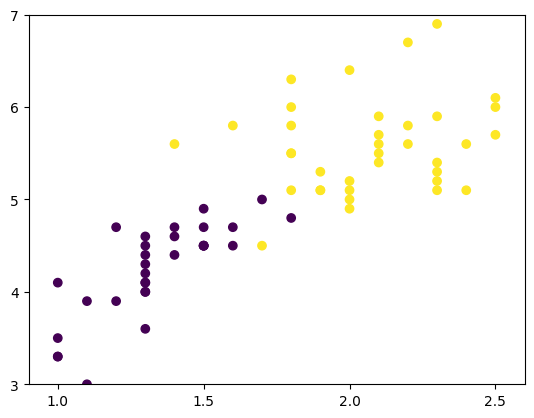

In [ ]:
# Visualizando os dados de treino
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x=X_train['petal width (cm)'],
           y=X_train['petal length (cm)'],
           c=y_train,
           cmap='viridis')

ax.set(xlim=(0.9, 2.6), xticks=[1,1.5,2,2.5],
       ylim=(3, 7), yticks=[3,4,5,6,7])

plt.show()

- **Usando o KNN**

In [ ]:
# Importando o KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Criando o classificador
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fazendo o fit com os dados de treino
clf = clf.fit(X_train,y_train)

In [ ]:
# Fazendo a previsão para os dados de teste
y_pred = clf.predict(X_test)

In [ ]:
# Verificando a matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[19,  0],
       [ 6,  8]])

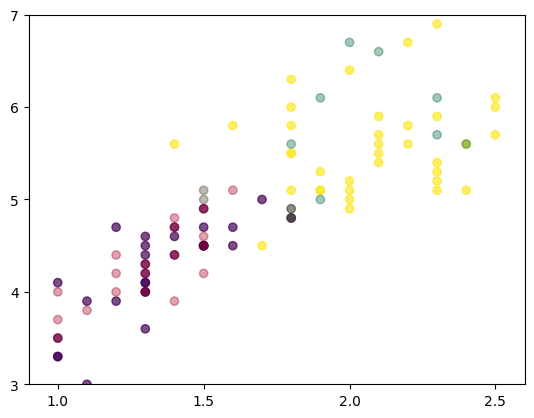

In [ ]:
# Podemos agora visualizar os dados de treino e teste
fig, ax = plt.subplots()

ax.scatter(x=X_train['petal width (cm)'],
           y=X_train['petal length (cm)'],
           c=y_train, alpha=0.7,
           cmap='viridis')
ax.scatter(x=X_test['petal width (cm)'],
           y=X_test['petal length (cm)'],
           c=y_pred,alpha=0.2,
           cmap='RdYlGn')
ax.scatter(x=X_test['petal width (cm)'],
           y=X_test['petal length (cm)'],
           c=y_test,alpha=0.2,
           cmap='RdYlGn')

ax.set(xlim=(0.9, 2.6), xticks=[1,1.5,2,2.5],
       ylim=(3, 7), yticks=[3,4,5,6,7])

plt.show()

In [ ]:
X_test[y_test != y_pred]

,petal length (cm),petal width (cm)
133,5.1,1.5
123,4.9,1.8
126,4.8,1.8
127,4.9,1.8
138,4.8,1.8
119,5.0,1.5
